In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns

In [3]:
print(sklearn.__version__)

0.24.2


In [4]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


SibSp - Sibling, spouse - how many siblings a particular passenger travelled with <br>
Parch - Parrent, child - whether a passenger's parrent or child was present in the ship <br>
Embarked -The port which the passenger got into the titanic <br> 
S-Southampton <br>
C-Cherbourg <br>
Q-Queenstown

In [5]:
titanic.shape

(891, 12)

In [6]:
#Some of the column has irrelevant information that may have no bearing whether 
#passenger survived the shinking of the Titanic 

titanic.drop(['PassengerId','Name','Ticket','Cabin'], 'columns', inplace=True)

In [7]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
titanic[titanic.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [9]:
#Lets drop missing data

titanic = titanic.dropna()

In [10]:
titanic.shape

(712, 8)

In [12]:
titanic[titanic.isnull().any(axis=1)].count()#make sure there is no null or missing value

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


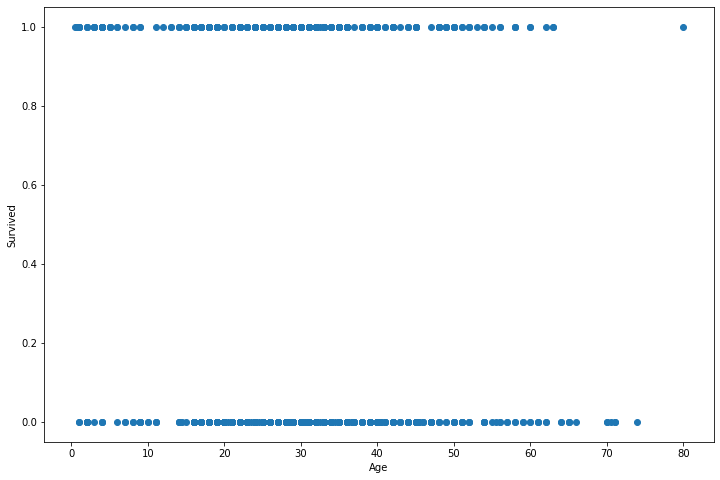

In [18]:
#Few plots

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(titanic['Age'], titanic['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

plt.show()

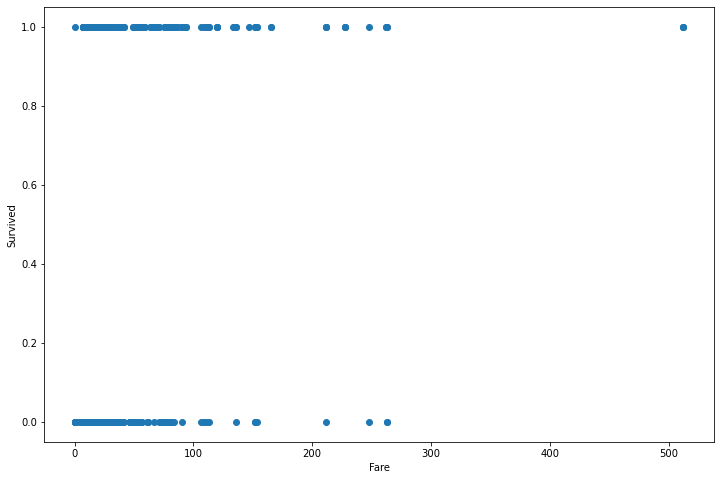

In [19]:
#Try with some other features

#Few plots

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(titanic['Fare'], titanic['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

plt.show()

Pairwise relationship using Scatter plot are not useful given this is binary classification problem, lets try and look into a different way using crosstab.<br>

The pd.crosstab() in pandas will setup a matrix for all possible values in sex column and survived columns

In [21]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [22]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [23]:
titanic_corr = titanic.corr()
titanic_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

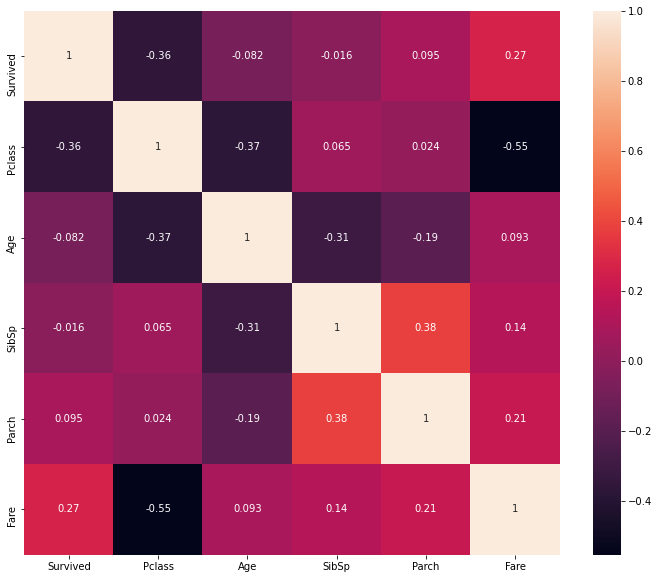

In [25]:
# Positive correlation - variables moves in same direction
# Negative correaltion -  variables moves in different direction 
#Take a look at visual representation

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(titanic_corr, annot=True)
#annot = True will display raw correlation numbers in this heatmap

In [27]:
#Many of the columns in titanic dataset have categorical  or discrete values
#ML models  only accepts numeric inputs, categorica data have to convert into numeric 

from sklearn import preprocessing

#convert catagorical values into ordered integer values 
#Label encoder is typically used with ordinal data, data has inherent order

label_encoding = preprocessing.LabelEncoder()

titanic['Sex'] = label_encoding.fit_transform(titanic['Sex'].astype(str))

titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [28]:
label_encoding.classes_ #will give you original categorical value that were label encoded.

array(['female', 'male'], dtype=object)

In [30]:
#Another common way to convert your categorical data into numeric is  one-hot encoding
#Categories with no intrinsic order can be converted to numerica values using one-hot encoding

titanic = pd.get_dummies(titanic, columns = ['Embarked'])


In [31]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [33]:
#Shuffle the dataset and save it out as a CSV


titanic = titanic.sample(frac=1).reset_index(drop=True)

#frac=1 will returns all the original records, we don't want to subset we need entire dataset

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,2.0,3,2,27.900,0,0,1
1,1,2,0,13.0,0,1,19.500,0,0,1
2,0,3,1,30.0,0,0,7.225,1,0,0
3,0,3,1,25.0,0,0,7.225,1,0,0
4,0,3,0,18.0,1,0,17.800,0,0,1


Shuffling your training data ensures that your ML model doesn't inadvertently pickup patterns in the ordering of your dataset.

In [34]:
titanic.to_csv('titanic_processed1.csv', index=False) #index isn't included

In [35]:
!ls

 building-classification-models-scikit-learn   titanic_processed1.csv
 fashion-mnist_train.csv		       titanic_processed.csv
'M01_D01_Ecploring Titanic Dataset.ipynb'      titanic_train.csv


<h1>Binary Classification-Logistic Regression using Titanic Dataset 

In [37]:
#Import preprocessed data
titanic = pd.read_csv('titanic_processed1.csv')

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,2.0,3,2,27.900,0,0,1
1,1,2,0,13.0,0,1,19.500,0,0,1
2,0,3,1,30.0,0,0,7.225,1,0,0
3,0,3,1,25.0,0,0,7.225,1,0,0
4,0,3,0,18.0,1,0,17.800,0,0,1


In [38]:
titanic.shape

(712, 10)

In [41]:
#train_test_split

from sklearn.model_selection import train_test_split

X = titanic.drop('Survived', axis=1)
Y = titanic['Survived']

#By default train_test_split will automatically shuffle data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [47]:
x_test.shape, y_test.shape

((143, 9), (143,))

In [51]:
#Import LogisticRegression

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

#penalty - regularization method
#Co specify the strength of your regularization
#solver optimizatino problem

Penalty = 'l2' default value used under the hood by the logisitc regresion Estimator, penalty implies that we are regularize the model by applying a penalty on overly complex models. Regularization is a method used in ML to penalize complex model so that the resulting model is so robust and better for predection.<br>

Different kinds of penalty - L1 and L2<br>
L2 - norm of the coefficient of your model as a penalty, L2-norms is simply sum of square of coefficient<br>

When you use the regularized model you can use c to specify the strength of your regularization, c - inverse of regularization of strength, smaller value indicates stringer regularization <br>

Solver = 'liblinear' algorithm to use in optimization problem, liblinear- works well on small dataset



In [52]:
#Lets predict
y_pred = logistic_model.predict(x_test)

In [53]:
#How the predictions of this model turned out, lets setup the actual test data and predicted value

pred_result = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})

In [58]:
pred_result.sample(10)

,y_test,y_pred
413,1,1
82,0,1
676,1,1
112,1,1
88,0,0
556,1,1
376,0,0
57,0,0
660,0,0
631,1,1


In [56]:
#Lets go to confusion matrix

titanic_crosstab = pd.crosstab(pred_result.y_pred, pred_result.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,67,18
1,15,43


In [59]:
#Lets measure it with metrics i.e accuracy score

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [60]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('accuracy score : ', acc)
print('precision score : ', prec)
print('recall score : ', recall)

accuracy score :  0.7692307692307693
precision score :  0.7413793103448276
recall score :  0.7049180327868853


For Binary classifier where you classify data into two categories your classifier should have accuracy over 50%, Our model has accuracy over 76% . This represents how many of the predicted values did our model get right <br>

Precision score - how many of the passengers that our model thought survived the sinking actually did survived i.e - True Positive<br>

Recall score - How many of the actual survivors of the Titanic did our model correctly predict?, lowish recall score indicates that there were many False negatives in our predictions.



In [61]:
 titanic_crosstab

y_test,0,1
y_pred,,
0,67,18
1,15,43


In [62]:
#y_test = 0 - passenger didn't survived, 1-passenger survived 
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [64]:
#Lets manually calculate accuracy scores manually

accuracy_score_verified = (TP+TN)/(TP+FP+TN+FN)
accuracy_score_verified

0.7692307692307693

In [65]:
#precision score

precision_score_survived = TP/(TP+FP)
precision_score_survived

0.7413793103448276

In [66]:
#Recall score

recall_score_survived =  TP/(TP+FN)
recall_score_survived

0.7049180327868853